In [162]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [252]:
testimg = "dataset/train/Small-flowered Cranesbill/1f14ed265.png"
reSize=(224,224)

In [253]:
class PLANTSAREA:
    def __init__(self, imgPath, reSize=(224,224)):
        image = cv2.imread(imgPath)
        self.image = cv2.resize(image, reSize, interpolation = cv2.INTER_AREA)        
        self.colorSpace = cv2.COLOR_BGR2HSV

    def extractPlantsArea(self):
        #Blur
        img = cv2.bilateralFilter(self.image,9,255,255)
        
        img = cv2.cvtColor(img, self.colorSpace)
        lower_color = np.array([25, 40, 40]) 
        upper_color = np.array([100, 225, 225]) 
        plants = cv2.inRange(img, lower_color , upper_color)
        #(H, S, gray) = cv2.split(mask)
        
        clone = plants.copy()
        #img2 = self.image
        _, cnts, _ = cv2.findContours(clone,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)  
        
        mask = np.zeros(self.image.shape[:2], dtype="uint8")
        for c in cnts:
            cv2.drawContours(mask, [c], -1, 255, -1)

        image = cv2.bitwise_and(self.image, self.image, mask=mask)
        return image

    def countPlantsArea(self, image):
        width = image.shape[1]
        height = image.shape[0]
        gArea = 0.0
        rArea = 0.0
        grArea = 0.0

        for pixel_w in range(0, width, 1):
            for pixel_h in range(0, height, 1):
                (b, g, r) = image[pixel_h, pixel_w]
                if(g>0):
                    gArea += 1     
                if(r>0):
                    rArea += 1
                if(r>0 and g>0):
                    grArea += 1

        totalArea = width*height
        return (gArea/totalArea, rArea/totalArea, grArea/totalArea)

In [254]:
plantsArea = PLANTSAREA(testimg, reSize)

In [255]:
imgPlants = plantsArea.extractPlantsArea()

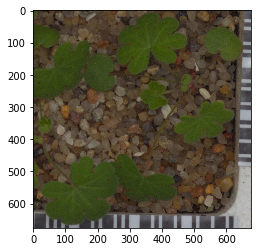

In [256]:
plt.imshow(mpimg.imread(testimg))

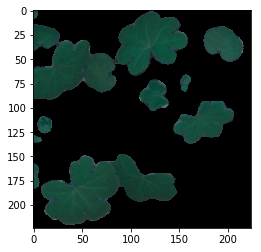

In [257]:
plt.imshow(imgPlants)